# Основы работы с PyTorch
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xknIfu4FOyyGo70jFrHbWcP1WHNhpw7G#scrollTo=uN6TB9khd_mM)

PyTorch - библиотека машинного обучения с открытым исходным кодом для Python. 

PyTorch используется для приложений машинного обучения и глубокие нейронные сети. 

Первоначально PyTorch был разработан исследовательской группой по искусственному интеллекту Facebook.

В оличии от большенства других фреймворков машинного обучения PyTorch совместим с библиотеками numpy и scikit-learn на уровне синтаксиса.

Давайте для начала попробуем импортировать библиотеку PyTorch

In [1]:
import torch

print('version:',torch.version.__version__)

version: 2.0.1+cpu


Теперь попробуем импортировать остальные библиотеки, которые понадобятся нам в этом уроке.

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

Теперь выберем устройство. Чаще всего возможны варианты использования `PyTorch` c центральным процессором (`CPU`) или с графическим ускорителем (`GPU`) комапании `NVidia` (поддержка фреймворка `cuda`). Однако, также последние версии `PyTorch` позволяют работать с расширенным набором устройств, среди которых следующие варианты: `cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mlc, xla, lazy, vulkan, meta, hpu`.

Итак выберем устройство (`CPU` или `GPU`) и  вывидем  необходимую информацию.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print('Cuda is available:',torch.cuda.is_available())
    
    n_devices = torch.cuda.device_count()
    print('number of devices: %d'%(n_devices))
    
    for cnt_device in range(n_devices):
        print(torch.cuda.get_device_name(cnt_device))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')


num_workers=os.cpu_count()
print ('available number of workers:',num_workers)
       
dtype = torch.float
torch.set_default_dtype(dtype) # float32
print('Current data type:',dtype)

Using device: cpu
available number of workers: 8
Current data type: torch.float32


Отметим, также, что по каждому устройству `GPU` может быть получена информация при помощи функций `torch.cuda.get_device_properties(device)` и `torch.cuda.mem_get_info(device=None)`; или в командной строке при помощи утилиты `nvidia-smi`. Более подробную информацию о доступной инфромации о `GPU` можно получить в соответствующем разделе документации [тут]( https://pytorch.org/docs/stable/notes/cuda.html).

Основной тип данных в `PyTorch` это тензор. Тензоры могут быть разной размерности и разного типа данных.  

В нашем случае, мы установили основной тип значений float32.

Однако, `PyTorch` поддерживает и другие типы, про которые можно узнать [тут](https://pytorch.org/docs/stable/tensors.html).

Важно понимать, что `PyTorch` является строготипизированным фрейм-ворком, это значит, что типы данных должны быть заданы и для каждой операции должны совпадать или быть преобразованными.

Также отметим, что тензор в данном понимании отличается от стандартного, принятого в физике, и обозначает просто многомерную матрицу.

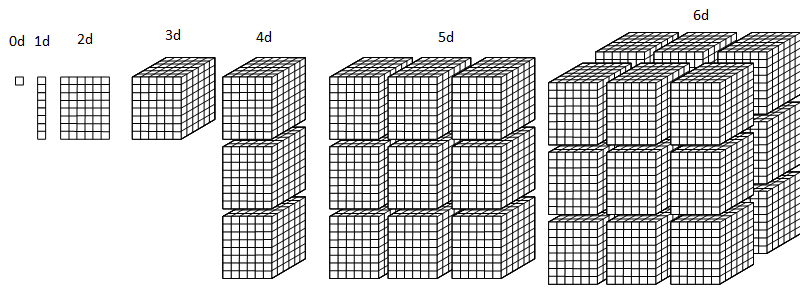

В целях воспроизводимости экспериментов мы установим все случайные величины в одно положение. Однако, отметим, что следующий код гарантирует воспроизводимость результов только для одной конфигурации вычилсительного устройства, включая как его аппаратную, так и его программную часть. Также отмечается, что в некоторых случаях использование деректив `deterministic` и `use_deterministic_algorithms` из кода ниже может замедлять или даже приводить к ошибка в работе `PyTorch`. Поэтому такие дерективы лучше использовать только в контролируемых экспериментах. Подробней о данной теме можно узнать [тут](https://pytorch.org/docs/stable/notes/randomness.html).

In [4]:
seed = 42
torch.manual_seed(seed) #cpu
torch.cuda.manual_seed(seed) #gpu
np.random.seed(seed) #numpy
random.seed(seed) # random and transforms

torch.backends.cudnn.deterministic=True #cudnn
# torch.use_deterministic_algorithms(True)

Рассмотрим примеры некоторых из приведенных выше тензоров:

In [5]:
x = torch.tensor(3.)
print(f'скалярная величина: {x}, {x.ndim}-d размерность\n')

x = torch.tensor([3.,2])
print(f'векторная величина: {x}, {x.ndim}-d размерность\n')

x = torch.tensor([[1.,2],[3.,4]])
print(f'матрица величина: \n{x},\n {x.ndim}-d размерность\n')

x = torch.tensor([[[1.,2],[3.,4]],[[5.,6],[7.,8]]])
print(f'набор матриц: \n{x},\n {x.ndim}-d размерность\n')
print(f' и т.д.')

скалярная величина: 3.0, 0-d размерность

векторная величина: tensor([3., 2.]), 1-d размерность

матрица величина: 
tensor([[1., 2.],
        [3., 4.]]),
 2-d размерность

набор матриц: 
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]]),
 3-d размерность

 и т.д.


C тензорами можно проводить большенство тех-же операций, что и с массивами в NumPy

In [6]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

l = torch.FloatTensor([[5,6,7],[8,9,10]]).to(device) # тензор заданного типа

n = torch.tensor([[0,1,2],[3,4,5]]).type(dtype) # тип по умолчанию

m = torch.from_numpy(np.ones([2,3], dtype=np.float32)).to(device) * 0.1 # нужно непосредственно указать тип

#-------------------
z = x + y*m + torch.exp(x)+torch.sqrt(n) + torch.pow(l,1.1)
print(z)

a = y[:,:1] + 1
print(a)

s = torch.transpose(z,0,1) #transposition with axis pointing

print(s.detach().cpu().numpy())

z = s@s.T #matrix multiplication
print(z)

z = s.matmul(s.T) #matrix multiplication
print(z)


tensor([[ 7.8101,  9.6437, 11.6166],
        [13.2706, 12.6141, 15.6690]])
tensor([[3.],
        [3.]])
[[ 7.81009  13.270558]
 [ 9.64367  12.614071]
 [11.616604 15.668995]]
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])


Обратите внимание на преобразования в numpy и в tensor в предыдущем примере!

Однако, некоторые операции в торч называются под другому.

In [7]:
z = s.mm(s.T) #matrix multiplication
print(z)

z = torch.mm(y.T, m) #matrix multiplication
print(z)

print(z.view(1,- 1)) #reshape

print(z.view(1,1,-1))# Добавим размерность

z = torch.mv(m.T,y[:,0]) #matrix to vector multiplication
print(z)

z = torch.dot(m[:,0],y[:,1]) #inner vector product
print(z)

tensor([[237.1052, 242.7137, 298.6630],
        [242.7137, 252.1152, 309.6765],
        [298.6630, 309.6765, 380.4629]])
tensor([[0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000]])
tensor([[0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000]])
tensor([[[0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
          0.4000]]])
tensor([0.4000, 0.4000, 0.4000])
tensor(0.4000)


In [8]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

z = torch.cat([x,y]) #dim = 0
print(z.shape,x.shape,y.shape)

z = torch.cat([x,y], dim=1)
print(z.shape)



torch.Size([4, 3]) torch.Size([2, 3]) torch.Size([2, 3])
torch.Size([2, 6])


Также в `PyTorch` есть ряд специфических операций, адаптированных под цели его использования

In [9]:
t = torch.tensor([1., 2.])
torch.save(t, 'tensor4test.pt')
print('saved t:',t)

del(t)

try:
    print(t)
except:
    print('tensor does not exist')
    
t_new = torch.load('tensor4test.pt')
print('new t:',t_new)



saved t: tensor([1., 2.])
tensor does not exist
new t: tensor([1., 2.])


*Отметим*, что в ряде случаев в `PyTorch` возможны два типа функций с именами вида   `foo(bar)` и `foo_(bar)`. Для таких случаев разница в том, что вариант вида  `foo(bar)`  является т.н. `immutable` функцией - то есть результа будет новым тензором в памяти. В противоположность ей функция вида `foo_(bar)` изменяет изначальный тензор, т.е. является `mutable` функцией. Последние ещё носят название `inplace` функций.

In [10]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2
print('inputs:\n',x,'\n',y,'\n');
z = torch.add(x,y)
print('result imutable\n',z)
x.add_(y)
print('\nresult mutable\n',x)

inputs:
 tensor([[ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]]) 
 tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

result imutable
 tensor([[3.1103, 0.3102, 1.0110],
        [2.9580, 3.3221, 2.8172]])

result mutable
 tensor([[3.1103, 0.3102, 1.0110],
        [2.9580, 3.3221, 2.8172]])


*При первом знакомстве с  `PyTorch` этот пример можно не изучать.*

*Отметим*, также, что в  `PyTorch` есть возможность для осуществления т.н. `bradcast` операций. Такие операции могут выполнены между тензорами, имеющими разную размерность, при условиях, что: начиная с конца размерности соврадают или промежуточные размерности имеют значение 1.

In [11]:
x = torch.randn(  2,3)
y = torch.randn(2,2,3)
# print((x+y), end='\n\n')
print(f'Case 1: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(2,1,3)
y = torch.randn(2,  3)
# print((x+y), end='\n\n')
print(f'Case 2: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')


x = torch.randn(2,1,1,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 3: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(1,2,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 4: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(5,6,3,3)
y = torch.randn(    3,3)
print(f'Case 5: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')


Case 1: input x:torch.Size([2, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 2, 3])

Case 2: input x:torch.Size([2, 1, 3]), y:torch.Size([2, 3]), output torch.Size([2, 2, 3])

Case 3: input x:torch.Size([2, 1, 1, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 1, 1, 2, 2, 3])

Case 4: input x:torch.Size([1, 2, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([1, 2, 2, 2, 3])

Case 5: input x:torch.Size([5, 6, 3, 3]), y:torch.Size([3, 3]), output torch.Size([5, 6, 3, 3])



Также отметим, что в некоторых функциях возможен вариант с дополнительным указанем выходного тензора в качестве аргумента

In [12]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2

d = torch.zeros_like(x)

torch.add(x,y,out = d)
print(d)

tensor([[ 1.8966,  2.6950, -0.1815],
        [ 1.9403,  1.6558,  1.1264]])


In [13]:
d[0,0].item(), d.size(), d.shape, 

(1.8966230154037476, torch.Size([2, 3]), torch.Size([2, 3]))

Также важно отметить, что по умолчанию в  `PyTorch` любое присвоение элементов тензоров происходит по ссылке то есть  `mutable` или т.н. `shallow` копирование. Такое поведение аналогично `NumPy`. Чтобы избежать данного эффекта и создать действительно новый тензор следует использовать метод `clone()`.

In [14]:
a = x
b = x.clone()
print(a)
x[0,0]=100
print(a)
print(b)

tensor([[-0.1034,  0.6950, -2.1815],
        [-0.0597, -0.3442, -0.8736]])
tensor([[ 1.0000e+02,  6.9503e-01, -2.1815e+00],
        [-5.9702e-02, -3.4418e-01, -8.7358e-01]])
tensor([[-0.1034,  0.6950, -2.1815],
        [-0.0597, -0.3442, -0.8736]])


Важно отметить возможности `PyTorch`  для работы с `GPU`. Если ваше устройство `GPU`, то поместить туда тензор можно при помощи метода `to()`. Обатно на `CPU` можно будет скопировать тензор при помощи метода `cpu()`. Проверить находится ли тензор в `GPU` можно при помощи метода `is_cuda`.

In [15]:
x = torch.tensor([1,2]).to(device)
print(x.is_cuda)
print(x.cpu().is_cuda)

False
False


Также могут быть следующие способы задания тензора или некоторых других объектов в `PyTorch` на заданном устройстве:

In [16]:
x = torch.tensor([1,2]).to(device)
x = torch.tensor([1,2],device = device)
x = torch.tensor([1,2]).cpu()
if torch.cuda.is_available():
    x = torch.tensor([1,2]).cuda()

Проверить устройство на котором находится тензор и некоторые другие его параметры можно следующими командами 

In [17]:
x = torch.tensor([1,2]).to(device)
print(f'shape: {x.shape}, device: {x.device}, dtype: {x.dtype}')


shape: torch.Size([2]), device: cpu, dtype: torch.int64


Также отметим, что для работы с `cuda` в `PyTroch` есть специальный модуль `torch.cuda`. В том числе, в данном модуле мы будем использовать такие функции как `torch.cuda.empty_cache()`  - которая переодически позволяет избежать ошибок при работе с памятью в `GPU`.

In [18]:
torch.cuda.empty_cache() 

Также посмотрим на то какие стандартные функции активации и слои имеются в `PyTroch`

In [19]:
data = torch.randn(2)
print(data, 'ReLU:', torch.relu(data))

tensor([-1.1370,  1.2559]) ReLU: tensor([0.0000, 1.2559])


In [20]:
data = torch.randn(2)
print(data, 'Sigmoid:', torch.sigmoid(data))


tensor([0.7429, 0.7445]) Sigmoid: tensor([0.6776, 0.6780])


Большенство стандартных элементов архитекетур нейронных сетей могут быть найдены в модуле `torch.nn`. Данный модуль включает `API` двух типов: в стиле классов и в процедурном стиле (функции). Для работы с последним необходим под-модуль `torch.nn.functional`. В том числе, модуль `torch.nn` включает типичные функции активации и слои.

Также отметим, что в `PyTorch`, как и в целом в `Python`, принято, что класс называется с большой буквы, а соответствующая процедура с маленькой.

In [21]:
from torch import nn

In [22]:
data = torch.randn(2)
print(data, 'GeLU:', torch.nn.functional.gelu(data))

tensor([ 2.1274, -0.2967]) GeLU: tensor([ 2.0919, -0.1138])


In [23]:
# Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
layer = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
data = torch.randn(2, 5)# data is 2x5. 
print(layer(data), layer(data).size()) 

tensor([[ 0.0973, -0.1948,  0.2779],
        [-0.3782,  0.3035, -0.4633]], grad_fn=<AddmmBackward0>) torch.Size([2, 3])


In [24]:
layer = nn.Conv1d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)  

data = torch.randn(1, 5, 2)
print(layer(data), layer(data).size())  

tensor([[[-0.8643],
         [-0.4674],
         [-0.8077]]], grad_fn=<ConvolutionBackward0>) torch.Size([1, 3, 1])


In [25]:
layer = nn.MaxPool1d(kernel_size = 2,
                   stride      = 1)  
data = torch.randn(1, 5, 2)
print(layer(data), layer(data).size())  

tensor([[[1.2613],
         [1.3864],
         [1.3003],
         [0.9260],
         [0.5903]]]) torch.Size([1, 5, 1])


In [26]:
layer = nn.Conv2d(in_channels  = 5,
                  out_channels = 3,
                  kernel_size  = 2,
                  stride       = 1,
                  padding_mode = 'zeros',)  

data = torch.randn(1, 5, 4, 2)
print(layer(data), layer(data).size())  

tensor([[[[-0.5546],
          [-0.2651],
          [-0.3872]],

         [[-0.2725],
          [ 0.4663],
          [-0.5086]],

         [[-1.1973],
          [-0.5099],
          [-0.0731]]]], grad_fn=<ConvolutionBackward0>) torch.Size([1, 3, 3, 1])


In [27]:
rnn  = nn.RNN(3, 2, 2) 
data = torch.randn(3, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, hn = rnn(data, h0)
print(output, output.size()) 


tensor([[[ 0.6421, -0.4539],
         [-0.0769,  0.1189]],

        [[ 0.1458, -0.3833],
         [ 0.5034, -0.3601]],

        [[ 0.7814, -0.6518],
         [ 0.6338, -0.5895]]], grad_fn=<StackBackward0>) torch.Size([3, 2, 2])


# Автодифференцирование
В библиотеке `PyTorch` имеется ряд встроенных функций, которые могут быть автотмаически 
вызваны в коде. 

Одной из основных такхи функций является автоматизированный градиент.

Данный механизм особенно важен при обучении нейронных сетей методом обратного распространения ошибки.

Для осуществления автоматизированной работы со встроенными функциями в PyTorch для них аргумент `requires_grad` должен быть помечен как `true`. 

Создадим тензор входных данных `x` и два тензора переменных коэффициентов `w` и `b`:

>*Отметим*, что в некоторых руководствах вы можете встретить тип переменной `Variable`. В первых версиях `PyTorch` данный тип предполагался как отдельный тип для переменных в которых будет проводится расчет градиента. Однако, в последних версиях `PyTorch` возможность расчета автоградиента включена в тензор.

In [28]:
x = torch.tensor([3.,4.])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)
print(x,w,b)


tensor([3., 4.]) tensor([4., 8.], requires_grad=True) tensor(5., requires_grad=True)


Построим теперь некоторую простейшую модель 

In [29]:
y = x*w+b
print(y)

tensor([17., 37.], grad_fn=<AddBackward0>)


допустим, что у нас есть целевое значение  `[20,40]`, расчитаем ошибку нашей модели

In [30]:
y_label = torch.tensor([20,40])
error = y_label - y

Для данной модели произведем автодифференцирование.

Отметим, что такая процедура выполняется для сколярной функции.

Также важно отметить, что предполагатеся, что градиент будет посчитан единожды, прежде, чем полученные значения будут где-то использованы. 

Поэтому, после использования градиента, его значения должны быть заменены нулями.

In [31]:
print('current gradient:',x.grad,w.grad,b.grad)

de = torch.sum(error).backward(retain_graph=True)

print(''' sum of de/dw:''', w.grad)
print('sum of de/db:', b.grad)

w.grad.data.zero_()
b.grad.data.zero_()

print( w.grad, b.grad)


current gradient: None None None
 sum of de/dw: tensor([-3., -4.])
sum of de/db: tensor(-2.)
tensor([0., 0.]) tensor(0.)


Обратите внимание, что в предыдущем примере процедура `backward` выполнялась для скалярного значения. Для этого мы посчитали сумму ошибок. Это связано с тем, что обратное распростронение ошбики расчитывается для одного значения, которое часто принято называть `loss`.
Такж отмтетим, что чаще вместо простой суммы в подобных выражениях будет квадрат ошибки. Минимизация по квадрату ошибки - стандартная задача регрессии.

Более подробную информацию об автодифференцировании можно найти [тут](https://pytorch.org/docs/stable/notes/autograd.html).

Важно отметить, что любые операции со значениями градиента лучше всего проводить с использованием дерективы `no_grad()`. Данная деректива не позволяет учитывать действия следующие за ней в будущих расчета ошибки.

Например, допустим, что мы считаетм значения градиентов весовых параметров и учитываем их с некоторым параметром (скорость обучения) в обновлении значений этих параметров. То есть мы считаем т.н. метод обратного распростронения ошибки.

Полная реализация описанного примера будует выглядеть так, как это показано ниже


In [32]:
LR = 0.01 # скорость обучения

x       = torch.tensor([3.,4.])
y_label = torch.tensor([20,40])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)

y = x*w+b

error = y_label - y

loss = error.square().sum()

loss.backward(retain_graph=True)

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()

Для того, чтобы pytorch мог высчитаывать автопроизводную для какой либо последовательности вычислений, а также для того, чтобы иметь возможность высчитывать такие последовательности вне ограничений языка Python фреймворк pytorch позволяет собрать т.н. вычислиетельный граф - то есть последовательность выичислений. Вычислительный граф может быть построен несколькими способами. В pytorch данная структура формируетя динамически в ходе т.н. прямого прохождения графа. 

Например для нашей модели `y` граф бы выглядел как-то так:

<img src="y_graph.png" width="250"  /> 

а для более продвинутого вида модели, аналогичной нашей, мы бы смогли визуализировать граф с использованием библиотеки `torchviz` при помощи следующего кода:
```python
try:
    import torchviz
except:
    !pip install torchviz
    !pip install graphviz
finally:
    from torchviz import make_dot
from torch import nn
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
x = torch.randn(1,8)
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

```
<img src="model_comp_graph.png" width="250"  /> 
более продвинутые примеры можно найти, например, тут


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/szagoruyko/pytorchviz/blob/master/examples.ipynb)

Также важно отметить, что в PyTorch дифференцирование производится численным способом. Это важно понимать для того, чтобы разработчику не вычислять производные самостоятельно. Однако, также важно понять, что для использования численного дифференцирования производная как таковая должна существовать.

Теперь, после того, как мы познакомились с некоторыми базовыми возможностями PyTorch попробуем записать линейную регрессию в рамках данного фреймворка.

Создадим набор данных для модели типа:

$y=w\cdotх+b + z$

где:
* Значение $w$ является наклоном.
* Значение $b$ — это смещение.
* $z$ - некоторый шум, неописываемый линейной моделью $y=w\cdotх+b$

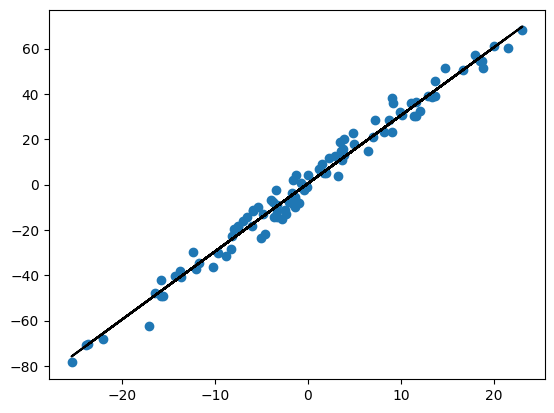

In [33]:
x = torch.randn(100, 1) * 10
y_clear = 3*x + 0.5
y = y_clear + 5 * torch.randn(100, 1)

plt.plot(x.cpu().numpy(),y.cpu().numpy(),'o')
plt.plot(x.cpu().numpy(),y_clear.cpu().numpy(),'-k')

Теперь попробуем применить линейнную регрессию для нашей модели. 

In [34]:
def model(x,w,b):
    return x * w + b

Проинициализируем параметры модели некоторыми случайными переменными

In [35]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

Зададим функцию потерь

$ MSE = \sum (y-x)^2 / N$

In [36]:
def mse(predicts, targets):
    diff = predicts - targets
    return torch.sum(torch.square(diff)) / diff.numel()

Посмотрим на начальные значения предсказаний и сравним их с ожидаемыми значениями путем подчета функции потерь (MSE)

In [37]:
predicts = model(x,w,b)
# print(predicts)

loss = mse(predicts, y)
print('loss = ',loss.data.cpu().numpy())

loss =  63.20079


Пока значение функции потерь большое модель будет давать большую ошибку предсказания

Для снижения функции потерь будем использовать метод градиентного спукска.

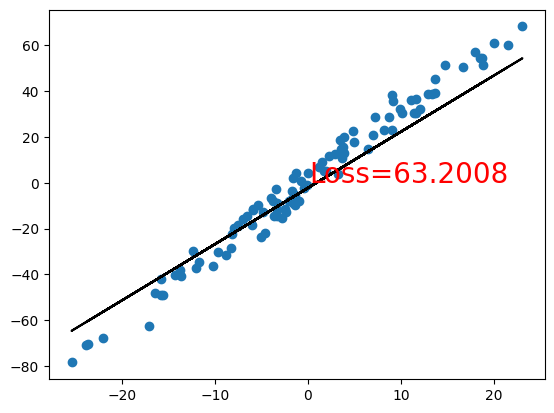

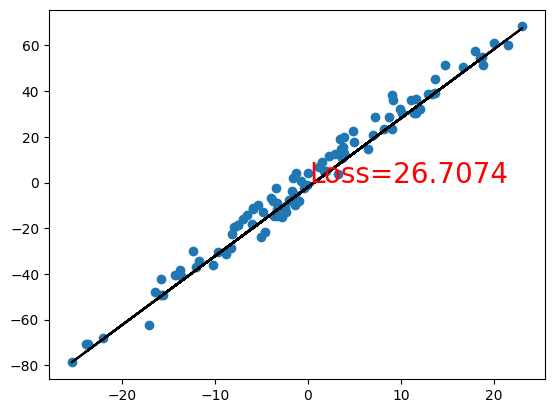

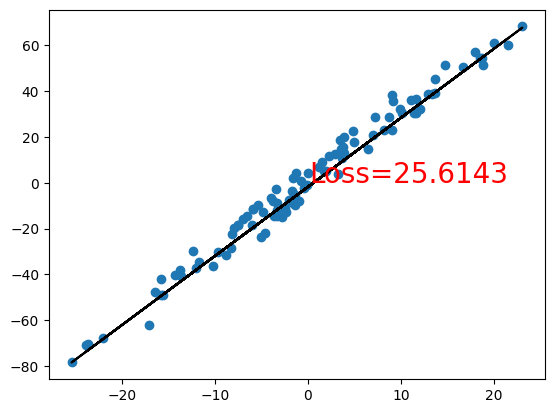

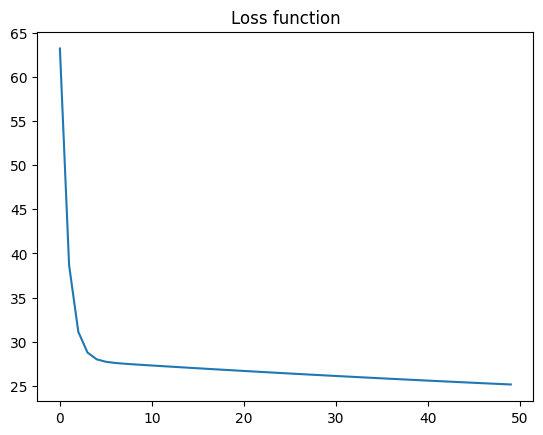

In [38]:
epochs = 50
LR = 0.002 

trainig = np.zeros(epochs)
for i in range(epochs):
    predicts = model(x,w,b)
    loss = mse(predicts, y)
    trainig[i] = loss.data.cpu().numpy()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
        w.grad.zero_()
        b.grad.zero_()

    if(i%20 == 0):
        plt.plot(x.data.cpu().numpy(),y.data.cpu().numpy(),'o')
        plt.plot(x.data.cpu().numpy(),predicts.data.cpu().numpy(),'-k')
        plt.text(0.1, 0.1, 'Loss=%.4f' %(trainig[i]), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        
plt.plot(trainig,)
plt.title('Loss function')
plt.show()

посмотрим на найденные значения наклона и смещения

In [39]:
print(w)
print(b)

tensor([3.0152], requires_grad=True)
tensor([-1.7050], requires_grad=True)


теперь попробуем реализовать регрессию в более поплуярном и принятом в `PyTorch` виде.
Осоновной способ, предлагаемый в `PyTorch` для создания моделей - это их наследование от базового класса `torch.nn.Module`. Однако, для упрощения, в некоторых случаях можно  мы используем контейрен `torch.nn.Sequential()` - конструкция которого знакома многим по опыту работы с `tf.keras`.

В созданном классе перопределим функцию инициализации - конструктор класса `__init__` и функцию реализующую прямое распростронение ошибки `forward`. 

Для построения линейной регрессии используем класс `nn.Linear` - фактически данный класс реализует выражение `y=Wx+b`


In [40]:
from torch import nn

In [41]:
model = nn.Sequential(nn.Linear(in_features=1, out_features=1))

Если работа в `PyTorch` производится с использованием `GPU`, то модель необходимо отправить на устройство. Для этого вы воспользуемся методом `to()` c указанием устройства.

Отметим также, что в случае, если обучение производится с использованием нескольких `GPU`, то модель рекомендуется загрузить с использованием контейнера `nn.DataParallel`. Например так:
```model = nn.DataParallel(model, device_ids=devices).to(devices[0])```. Подробней про параллелизм данных в `PyTorch` можно прочитать, например, [тут](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html).

In [42]:
model = model.to(device)

Отметим, что в случае с `nn.Model` регрессия могла бы быть записана следующим образом.
```python
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.l1(x)
```
При этом инициализация модели могла бы быть записана следующим образом.
```python
model =  LinearRegression()   
```

Посмотрим на набор параметров созданной модели, по этим параметрам будет вычисляться градиент. Сейчас параметры проинциаилизированы некоторыми случайными значениями.

In [43]:
w,b = model.parameters()
print(w,b)

Parameter containing:
tensor([[-0.1357]], requires_grad=True) Parameter containing:
tensor([-0.4162], requires_grad=True)


Теперь выберем стандартную функцию потерь и оптимизатор (метод градиентного спуска). 

Отметим, что при использовании `GPU` функция потерь также должна быть загружена на вычислительное устройство - это тоже часть вычислительного графа.

In [44]:
LR = 0.005
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
criterion = criterion.to(device)


Проведем обучение сети. В данном случае нам непонадобится вручную обновлять значения весов и делать некоторые другие операции из проведенных выше. Все эти операции за нас сделает экземпляр класса `optimizer`.

Epoch:  1  Loss:  1131.10986328125
Epoch:  21  Loss:  20.169780731201172
Epoch:  41  Loss:  19.891254425048828
Epoch:  61  Loss:  19.70492935180664
Epoch:  81  Loss:  19.580276489257812


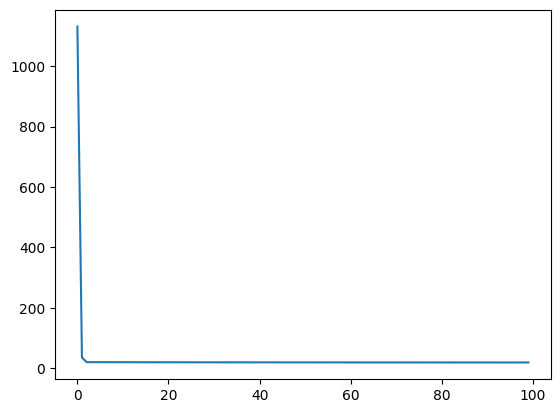

In [45]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    predict = model.forward(x)
    
    loss = criterion(predict, y)

    losses[i] = loss.data.cpu().numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

Посмотрим на то, какие теперь получились значения наших параметров

In [46]:
[w, b] = model.parameters()
print(w,b)


Parameter containing:
tensor([[3.0163]], requires_grad=True) Parameter containing:
tensor([0.2932], requires_grad=True)


Визуализируем результат предсказания

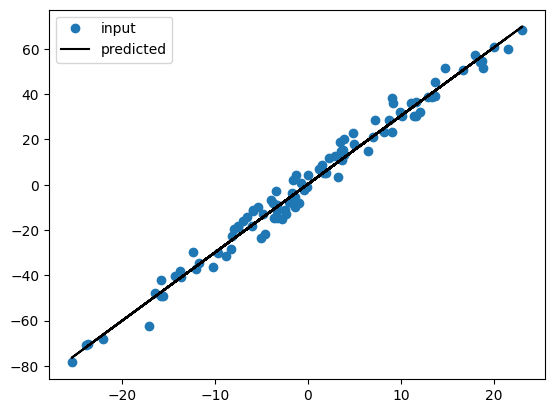

In [47]:
predict = model.forward(x)
plt.plot(x.data.cpu().numpy(),
         y.data.cpu().numpy(),'o', 
         label='input')
plt.plot(x.data.cpu().numpy(),
         predict.data.cpu().numpy(),'-k', 
         label='predicted')
plt.legend()
plt.show()

Посмотрим на то, какие данные из модели можно получать.

Для этого есть несколько способов

In [48]:
print('Parameters\n',list(model.parameters()), end='\n\n')
print('Parameters Names\n',list(model.state_dict()), end='\n\n')
# print(list(model.named_buffers()))
print('Named Parameters\n', list(model.named_parameters()), end='\n\n')

Parameters
 [Parameter containing:
tensor([[3.0163]], requires_grad=True), Parameter containing:
tensor([0.2932], requires_grad=True)]

Parameters Names
 ['0.weight', '0.bias']

Named Parameters
 [('0.weight', Parameter containing:
tensor([[3.0163]], requires_grad=True)), ('0.bias', Parameter containing:
tensor([0.2932], requires_grad=True))]



In [49]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

num_params = sum(p.numel() for p in model.parameters() )
print('Number of all parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 2
Number of all parameters for the model: 2


Также для оценки модели есть специальная функция ```summary``` из библиотеки ```torchsummary```

In [50]:
try:
    import torchsummary
except:
    !pip install torchsummary
finally:
    from torchsummary import summary

summary(model,input_size = x.shape[1:])

  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


теперь попробуем сохранить модель

In [51]:
torch.save(model.state_dict(), 'test_module.pt')

удалим модель

In [52]:
del(model)

теперь заново загруим модель, но назовем ее ```new_model```

In [53]:
new_state_dict = torch.load('test_module.pt')
new_model = nn.Sequential(nn.Linear(in_features=1, out_features=1))
new_model.load_state_dict(new_state_dict)

<All keys matched successfully>

*Отметим*, что для модели в классовом стиле тут не пришлось бы переписывать модель, а необходимо бы было лишь создать новый экземпляр класса,
```python
new_model = LinearRegression()
```

проверим, что новая модель соответствует обученной прежде

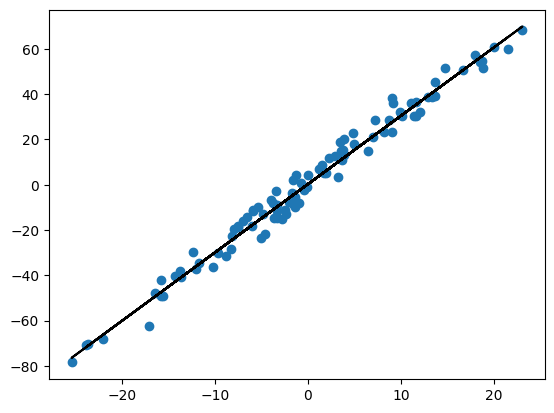

In [54]:
predict = new_model.forward(x)
plt.plot(x.data.cpu().numpy(),
         y.data.cpu().numpy(),'o')
plt.plot(x.data.cpu().numpy(),
         predict.data.cpu().numpy(),'-k')

Также модель можно сохранить с использованием JIT скрипотов, что полезно для ее последующего портирования, например на С++

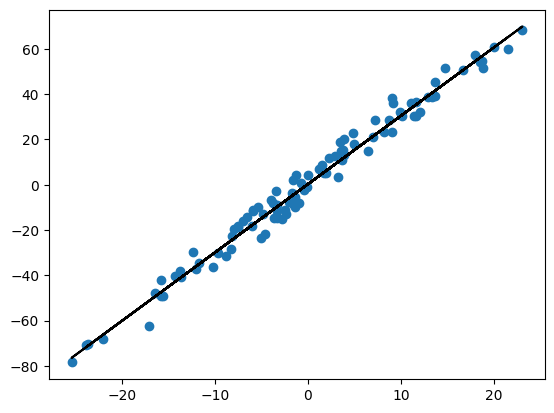

In [55]:
scripted_module = torch.jit.script(new_model)
torch.jit.save(scripted_module, 'mymodule.pt')
again_new_model = torch.jit.load('mymodule.pt')

predict = again_new_model.forward(x)
plt.plot(x.data.cpu().numpy(),
         y.data.cpu().numpy(),'o')
plt.plot(x.data.cpu().numpy(),
         predict.data.cpu().numpy(),'-k')

Для закрепления результата давайте посмотрим на реализацию многоклассовой (softmax) регрессии в `PyTorch`.

Создадим набор данных из трех классов.


In [56]:
from sklearn import datasets
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import numpy as np

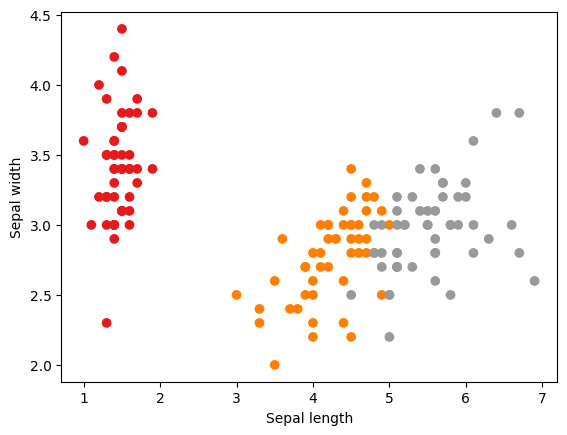

(150, 2)
(150,)
torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


In [57]:
iris = datasets.load_iris()

x = iris.data[:,[2,1] ]
y = (iris.target) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# standardize
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

print(x.shape)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Запишем модель регрессии в стиле `nn.Sequential`

In [58]:
model = nn.Sequential(nn.Linear(in_features=x_train.shape[1], out_features=3),
                     nn.Softmax(dim=1))
summary(model,input_size = x.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]               9
           Softmax-2                    [-1, 3]               0
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


<blockquote>
<em>Модель в  стиле класса имела бы следующий вид.</em>

  ```python
  class SoftmaxRegression(nn.Module):    
      
      def __init__(self, 
                  in_features = 2, 
                  n_classes   = 3):
          
          super().__init__()
          
          self.l1 = nn.Linear(in_features=in_features, out_features=n_classes)
          
      def forward(self, x):
          return torch.nn.functional.softmax(self.l1(x), dim=1)
  ```
<blockquote>
  а инициализация модели могла бы быть записана как
  
  ```python
  model = SoftmaxRegression(x_train.shape[1],3)
  summary(model,input_size = x.shape[1:])
  ```

  *Ометим*, что в будущих практиках мы перейдем к стилю классов,  так как тот является более гибким и более распростронен для `PyTorch`.

Теперь перейдем к обучению модели.

В качестве функции потерь выберем `nn.CrossEntropyLoss()` - корсс-энтропию. Отметим, что данный тип функции потерь относится к *sparse сategorical cross entropy*, то есть не требует *one hot* кодириования.

В качестве оптимизатора зададим `torch.optim.SGD`.

In [59]:
LR = 0.4

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

Epoch:  1  Loss:  1.2226604223251343
Epoch:  201  Loss:  0.7240305542945862
Epoch:  401  Loss:  0.6869716048240662
Epoch:  601  Loss:  0.6631860136985779
Epoch:  801  Loss:  0.6487677693367004


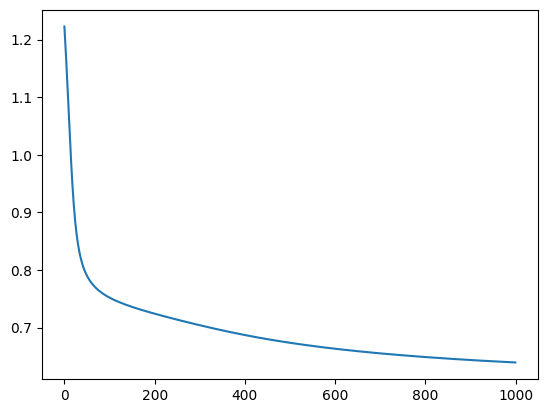

In [60]:
epochs = 1000
losses = np.zeros(epochs)

for i in range(epochs):

    predict = model.forward(x_train.to(device))

    loss = criterion(predict, torch.squeeze(y_train).type(torch.LongTensor).to(device))

    losses[i] = loss.data.cpu().numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

В результате функция предсказания выдает 3 класса в виде массива. 

Мы можем построить данные классы отдельно для того, чтобы посмотреть на ошибки.

torch.Size([150, 3])


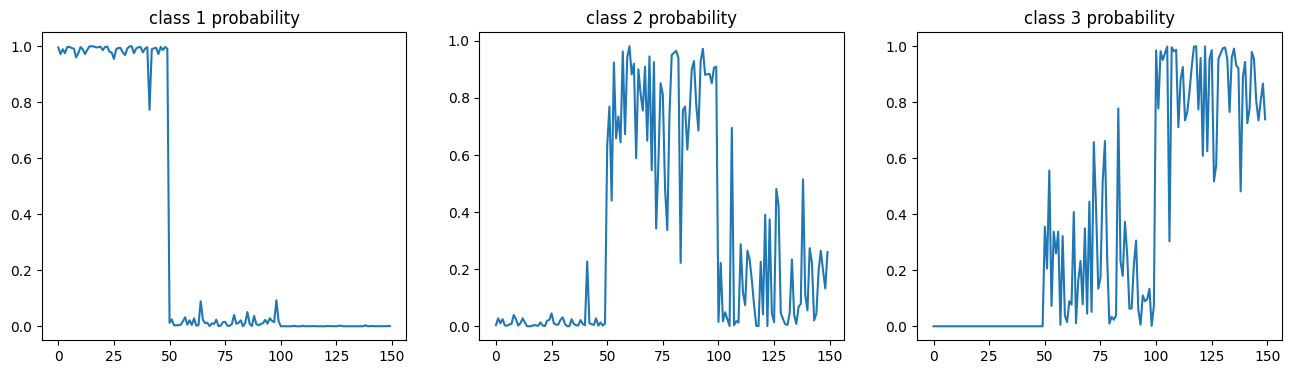

In [61]:
predict = model.forward(torch.from_numpy(x).type(torch.float).to(device))
print(predict.shape)
Z = predict.detach().cpu().numpy()
plt.figure(figsize = (16,4))
plt.subplot(1,3,1);plt.plot(Z[:,0]);plt.title('class 1 probability')
plt.subplot(1,3,2);plt.plot(Z[:,1]);plt.title('class 2 probability')
plt.subplot(1,3,3);plt.plot(Z[:,2]);plt.title('class 3 probability')
plt.show()

Также полезным будет визуализация нашего классификатора

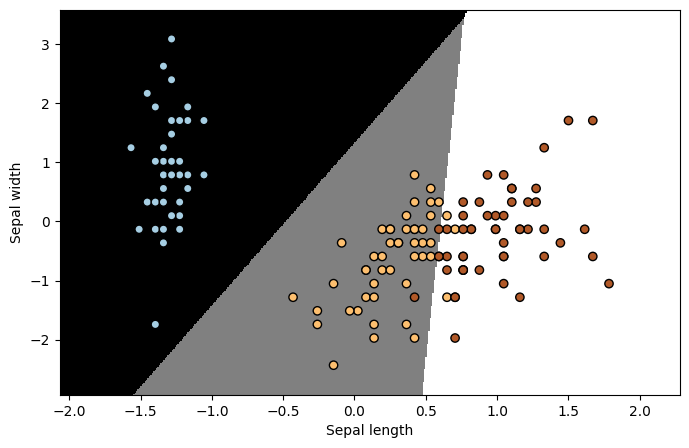

In [62]:
import matplotlib.pyplot as plt


x1_min, x1_max = x[:, 0].min() - .5, x[:, 0].max() + .5
x2_min, x2_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
 
    
    
predict = model.forward(torch.from_numpy(np.c_[xx1.ravel(), xx2.ravel()]).type(torch.float).to(device))
Z = predict.detach().cpu().numpy().argmax(axis=1).reshape(xx1.shape)

plt.figure(figsize=(8, 5))

plt.pcolormesh(xx1, xx2, Z,shading='auto', cmap=plt.cm.gray)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())


plt.show()

Упражнения:
1. Напишите функцию вручную вычисляющую производную выражения:
$$ y = 3x^2+4x$$ и проверьте результа на сходимость с результатом автодифференцирования в PyTorch.
2. Трансформируйте набор данных ирисы в два класса и постройте логистическую регрессию в PyTorch.
3. Перепишите модель логистической регрессии  с использованием шаблона `Sequential`. Данный подход является альтернативным к подходу наследования класса.
<details>
<summary>Click here for hint</summary>
```

   model = nn.Sequential(
        nn.Linear(in_features=x_train.shape[1], out_features=1), 
        nn.Sigmoid()    
        )      
```
    
</details>


1

In [69]:
import torch
from torch.autograd import Variable

# Определим функцию
def f(x):
    return 3*x**2 + 4*x

# Вручную вычислим производную
def df_manual(x):
    return 6*x + 4

# Протестируем производную функцию вручную
x = Variable(torch.tensor(2.0), requires_grad=True)
y = f(x)
y.backward()
print('Ручная производная при x=2:', df_manual(x.data))

# Compare with automatic differentiation
print('Результат автоматической дифференциации:', x.grad)

Ручная производная при x=2: tensor(16.)
Результат автоматической дифференциации: tensor(16.)


2

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка набора данных ирисы
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Преобразование набора данных в два класса
X = X[y != 2]  # Удаляем третий класс
y = y[y != 2]
y = y.reshape(-1, 1)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

# Определение модели логистической регрессии в PyTorch
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

# Создание экземпляра модели
input_dim = X.shape[1]
model = LogisticRegression(input_dim)

# Определение функции потерь и оптимизатора
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Обучение модели
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Оценка модели на тестовом наборе
with torch.no_grad():
    predicted = model(X_test_tensor)
    predicted = predicted.round()
    accuracy = (predicted == y_test_tensor).sum().item() / y_test.shape[0]
    print(f'Accuracy on test set: {accuracy}')

Epoch [100/1000], Loss: 0.3472800850868225
Epoch [200/1000], Loss: 0.21130724251270294
Epoch [300/1000], Loss: 0.15078064799308777
Epoch [400/1000], Loss: 0.11716417223215103
Epoch [500/1000], Loss: 0.09589045494794846
Epoch [600/1000], Loss: 0.08124232292175293
Epoch [700/1000], Loss: 0.0705472007393837
Epoch [800/1000], Loss: 0.062395453453063965
Epoch [900/1000], Loss: 0.055975209921598434
Epoch [1000/1000], Loss: 0.05078652501106262
Accuracy on test set: 1.0


3

In [77]:
# Определение модели логистической регрессии с использованием Sequential
model = nn.Sequential(
    nn.Linear(in_features=X.shape[1], out_features=1),
    nn.Sigmoid()
)

# Определение функции потерь и оптимизатора
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Обучение модели
num_epochs = 1000
for epoch in range(num_epochs):
    # Прямой проход
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Обратный проход и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4416
Epoch [200/1000], Loss: 0.2390
Epoch [300/1000], Loss: 0.1613
Epoch [400/1000], Loss: 0.1217
Epoch [500/1000], Loss: 0.0979
Epoch [600/1000], Loss: 0.0820
Epoch [700/1000], Loss: 0.0707
Epoch [800/1000], Loss: 0.0622
Epoch [900/1000], Loss: 0.0556
Epoch [1000/1000], Loss: 0.0503
